## 简单逻辑回归

In [46]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("salary.csv")
df = df.sort_values(by="year")

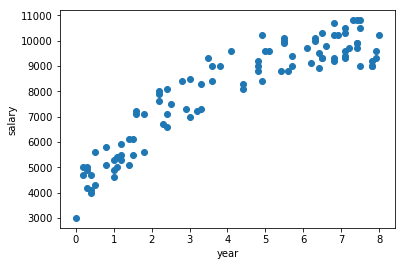

In [47]:
#绘制散点图，看下year和salary之间的大致分布
plt.scatter(df["year"],df["salary"])
plt.xlabel("year")
plt.ylabel("salary")
plt.show()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


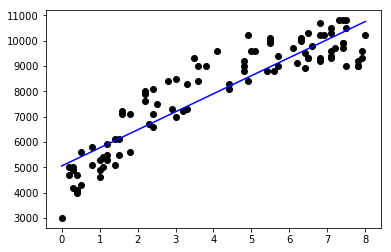

In [48]:
#year和salary之间有很强的相关性，且salary是数值，连续、可加、可减。因此使用scikit-learn中的Regression监督学习算法。
X = df[["year"]]
print(type(year))
Y = df["salary"].values
print(type(salary))
#使用线性回归
reg = LinearRegression()
#喂数据，训练得到模型
model = reg.fit(X,Y)
print(model)
#使用模型预测year对应的salary,并绘制出图
plt.scatter(year,salary,color="black")
salary_ = model.predict(X)
plt.plot(X,model.predict(X),color="blue")
plt.show()

In [49]:
model.coef_

array([ 712.59413615])

In [50]:
model.intercept_

5049.0098998138383

In [51]:
model.predict([[6],[10]])

array([  9324.57471669,  12174.95126127])

## 多项式线性回归

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt


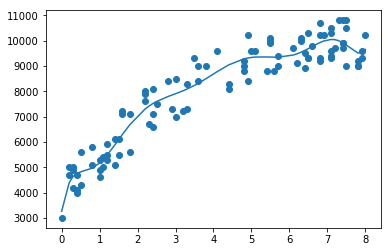

In [53]:
poly_reg = PolynomialFeatures(degree=10)
#三项式转换
X_  = poly_reg.fit_transform(X)
linear = LinearRegression()
model = linear.fit(X_,Y)
plt.scatter(X,Y)
plt.plot(X,model.predict(X_))
plt.show()

### 多元线性回归

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#加载房价数据
df = pd.read_csv("house-prices.csv")

In [49]:
#数据里面有离散的属性如：Brick、和Neighborhood
#为了能使用离散属性进行线性拟合
pd.get_dummies(df["Brick"]).head()


,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [50]:
pd.get_dummies(df["Neighborhood"]).head()

,East,North,West
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [51]:
#将dummy variable 和并到df上
df = pd.concat((df,pd.get_dummies(df["Brick"]),pd.get_dummies(df["Neighborhood"])),axis=1)
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,No,Yes,East,North,West
0,1,114300,1790,2,2,2,No,East,1,0,1,0,0
1,2,114200,2030,4,2,3,No,East,1,0,1,0,0
2,3,114800,1740,3,2,1,No,East,1,0,1,0,0
3,4,94700,1980,3,2,3,No,East,1,0,1,0,0
4,5,119800,2130,3,3,3,No,East,1,0,1,0,0


In [52]:
#去除【信息重复多重共线性（Multicollinearity）】的列和不必要的列
del df["Brick"]
del df["Neighborhood"]
del df["No"]#因为Yes = 1-No
del df["North"]
del df["Home"]

In [53]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,West
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [58]:
X = df[["SqFt","Bedrooms","Bathrooms","Offers","Yes","East","West"]].sort_values(by="SqFt")
print(type(X))
Y = df["Price"]
#用现有的数据进行数据分析
linear = LinearRegression()
model = linear.fit(X,Y)

<class 'pandas.core.frame.DataFrame'>


In [59]:
#预测
Y_ = model.predict(X)

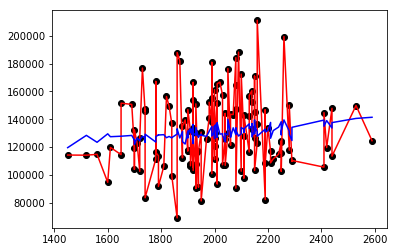

In [65]:
#绘制出面积和房价的散点图
plt.scatter(X["SqFt"],Y,color="black")
plt.plot(X["SqFt"],Y,color="red")
salary_ = model.predict(X)
plt.plot(X["SqFt"],Y_,color="blue")
plt.show()